# Help Navigate Robots

This project is a kaggle problem, <a href='https://www.kaggle.com/c/career-con-2019/overview'>Click Here</a> to see the full problem.

<a href='http://help-robots.herokuapp.com/'>Click Here</a> to check its deployment

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [65]:
import numpy as np
import pandas as pd
# import phik
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from ipywidgets import interact
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.style.use('ggplot')
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

import pickle

In [4]:
# path = '/content/drive/MyDrive/Deep Learning/project 1 (Help Navigate Robots)/'
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')

print('Train shape: ', X_train.shape, y_train.shape)
print('Test  shape: ', X_test.shape)

Train shape:  (487680, 13) (3810, 3)
Test  shape:  (488448, 13)


In [5]:
print(X_train.shape)
display(X_train.head())
display(X_train.tail())

(487680, 13)


,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
487675,3809_123,3809,123,0.62871,-0.76878,-0.084391,0.081093,0.003167,0.093760,-0.14274,3.27180,2.0115,-9.0063
487676,3809_124,3809,124,0.62884,-0.76868,-0.084365,0.081099,0.014994,0.032637,-0.13238,4.42750,3.0696,-8.1257
487677,3809_125,3809,125,0.62891,-0.76861,-0.084345,0.081178,-0.031184,-0.003961,-0.13894,2.70480,4.2622,-8.1443
487678,3809_126,3809,126,0.62903,-0.76850,-0.084414,0.081231,-0.069153,0.013229,-0.13021,2.54100,4.7130,-9.4435
487679,3809_127,3809,127,0.62915,-0.76839,-0.084441,0.081284,-0.042769,0.034049,-0.12580,0.82391,4.2751,-10.4980


**Observation :-** There are 487680 row entries and 13 columns.

- row_id :- it can be considered as index
- series_id :- it is the ID number for the measurement series, i.e. total 3810 times the the data is collected
- measurment_number :- it is the Measurement number within the series, for every series_id, 128 measurment are taken.
- orientation :- this represent the position of robots in the space.
- angular_velocity :- this represent the speed of robots in the X, Y and Z direction.
- linear_acceleration :- this shows the rate of change of linear velocity in the X, Y and Z direction.

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487680 entries, 0 to 487679
Data columns (total 13 columns):
row_id                   487680 non-null object
series_id                487680 non-null int64
measurement_number       487680 non-null int64
orientation_X            487680 non-null float64
orientation_Y            487680 non-null float64
orientation_Z            487680 non-null float64
orientation_W            487680 non-null float64
angular_velocity_X       487680 non-null float64
angular_velocity_Y       487680 non-null float64
angular_velocity_Z       487680 non-null float64
linear_acceleration_X    487680 non-null float64
linear_acceleration_Y    487680 non-null float64
linear_acceleration_Z    487680 non-null float64
dtypes: float64(10), int64(2), object(1)
memory usage: 48.4+ MB


**Observation:** Every feature have no null values.

In [7]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
series_id,487680.0,1904.500000,1099.853353,0.00000,952.000000,1904.500000,2857.000000,3809.00000
measurement_number,487680.0,63.500000,36.949327,0.00000,31.750000,63.500000,95.250000,127.00000
orientation_X,487680.0,-0.018050,0.685696,-0.98910,-0.705120,-0.105960,0.651803,0.98910
orientation_Y,487680.0,0.075062,0.708226,-0.98965,-0.688980,0.237855,0.809550,0.98898
orientation_Z,487680.0,0.012458,0.105972,-0.16283,-0.089466,0.031949,0.122870,0.15571
orientation_W,487680.0,-0.003804,0.104299,-0.15662,-0.106060,-0.018704,0.097215,0.15477
angular_velocity_X,487680.0,0.000178,0.117764,-2.37100,-0.040752,0.000084,0.040527,2.28220
angular_velocity_Y,487680.0,0.008338,0.088677,-0.92786,-0.033191,0.005412,0.048068,1.07910
angular_velocity_Z,487680.0,-0.019184,0.229153,-1.26880,-0.090743,-0.005335,0.064604,1.38730
linear_acceleration_X,487680.0,0.129281,1.870600,-36.06700,-0.530833,0.124980,0.792263,36.79700


In [8]:
print(y_train.shape)
display(y_train.head())
display(y_train.tail())

(3810, 3)


,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles


,series_id,group_id,surface
3805,3805,55,tiled
3806,3806,67,wood
3807,3807,48,fine_concrete
3808,3808,54,tiled
3809,3809,56,soft_pvc


In [9]:
y_train['group_id'].nunique()

# Observation:- all the data is recorded in 73 recording session.

73

In [10]:
y_train.groupby('group_id')['surface'].nunique().max()

# Observation : Every recording session, records only single surface

1

In [11]:
for surface in y_train['surface'].unique():
    print(surface, '---', y_train[y_train['surface']==surface].group_id.unique())

fine_concrete --- [13 35 30 68 72 36 48]
concrete --- [31 20 12 32  0  5 62 41 42 61 57 47 39 50 63]
soft_tiles --- [22 21  9 15  4 17]
tiled --- [ 1 11  8 28 71 55 54 64 66]
soft_pvc --- [34 26  3 29 19 18  6 69 70 56 53 51 37 58]
hard_tiles_large_space --- [33 16 59 40 44]
carpet --- [25  7 60 52]
hard_tiles --- [27]
wood --- [23 14 10  2 24 45 49 46 38 43 65 67]


Every serie has been recorded in a particular recording session indicated by group_id feature. There are 73 different recording sessions.

- hard_tiles is only recorded in group 27
- carpet is recorded in group 25, 7, 60 and 52 and so on

In [12]:
# y_train['group_id'].sort_values().unique()
# y_train['group_id'].value_counts()

In [13]:
# merging the source and target data
data = X_train.merge(y_train, on='series_id' )
print(data.shape)
data.head()

(487680, 15)


,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,group_id,surface
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532,13,fine_concrete
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128,13,fine_concrete
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267,13,fine_concrete
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960,13,fine_concrete
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410,13,fine_concrete


In [14]:
print("Number of classess: ", data['surface'].nunique())
y_train['surface'].value_counts()

Number of classess:  9


concrete                  779
soft_pvc                  732
wood                      607
tiled                     514
fine_concrete             363
hard_tiles_large_space    308
soft_tiles                297
carpet                    189
hard_tiles                 21
Name: surface, dtype: int64

**Observation:-** ther are nine calsses

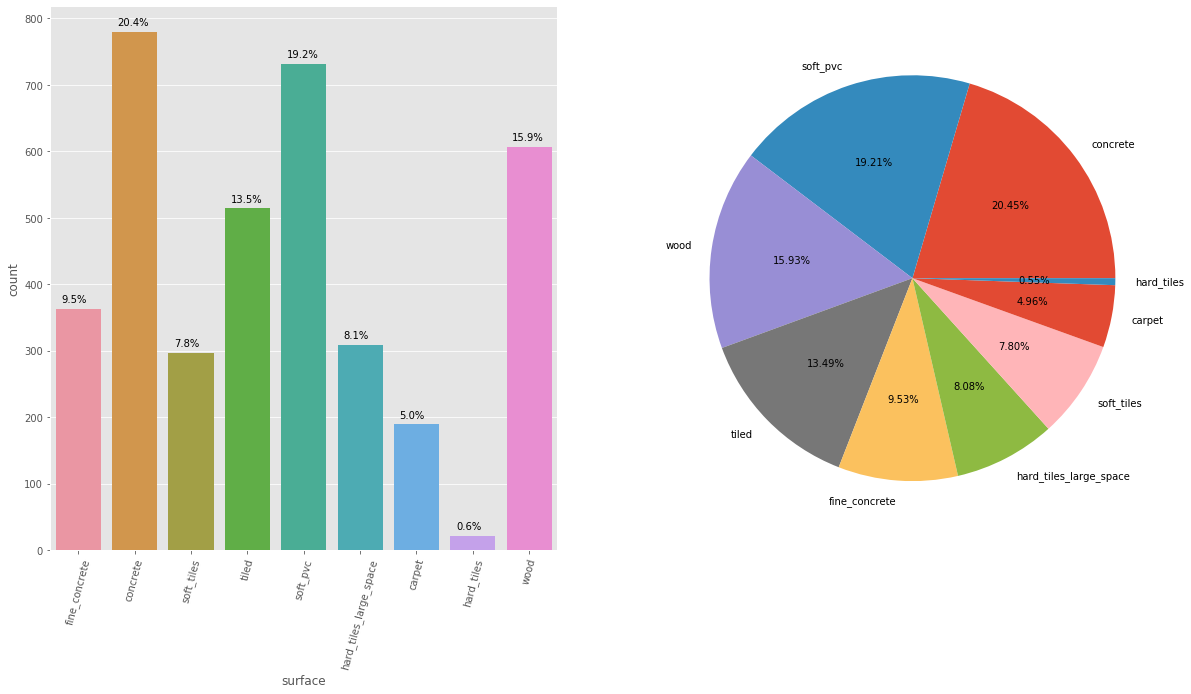

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
g = sns.countplot(x='surface', data=y_train)
plt.xticks(rotation=75);

total = len(y_train)
for p in g.patches:
    g.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+10))
        
# #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
# g.yaxis.set_ticks(np.linspace(0, total, 11))

# #adjust the ticklabel to the desired format, without changing the position of the ticks. 
# g.set_yticklabels(map('{:.1f}%'.format, 100*g.yaxis.get_majorticklocs()/total))

plt.subplot(1,2,2)
x1 = y_train['surface'].value_counts().values
label = y_train['surface'].value_counts().index

plt.pie(x1, labels=label, autopct='%1.2f%%');
# plt.legend();

**Observation:-** imbalance dataset, where 'concrete' class has highest and 'hard_tiles' has lowest entries.

In [16]:
# let's change class labels to numeric
labels={'fine_concrete':0, 'concrete':1, 'soft_tiles':2, 'tiled':3, 'soft_pvc':4,
       'hard_tiles_large_space':5, 'carpet':6, 'hard_tiles':7, 'wood':8}
inverse_labels = dict([(j,i) for i,j in labels.items()])

data['surface'] = data['surface'].map(labels)

In [17]:
data.head(2)

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,group_id,surface
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532,13,0
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128,13,0


In [18]:
data.columns

Index(['row_id', 'series_id', 'measurement_number', 'orientation_X',
       'orientation_Y', 'orientation_Z', 'orientation_W', 'angular_velocity_X',
       'angular_velocity_Y', 'angular_velocity_Z', 'linear_acceleration_X',
       'linear_acceleration_Y', 'linear_acceleration_Z', 'group_id',
       'surface'],
      dtype='object')

In [19]:
# sice 'row_id', 'series_id', 'measurement_number' are not useful feature these are somehow Id numbers, 
# hence selecting only useful feature.
cols = ['orientation_X', 'orientation_Y', 'orientation_Z', 'orientation_W', 'angular_velocity_X', 'angular_velocity_Y',
        'angular_velocity_Z', 'linear_acceleration_X', 'linear_acceleration_Y', 'linear_acceleration_Z']

# Univariate Analysis

### Box plot of Orientation, liner acceleration, and angular velcoity

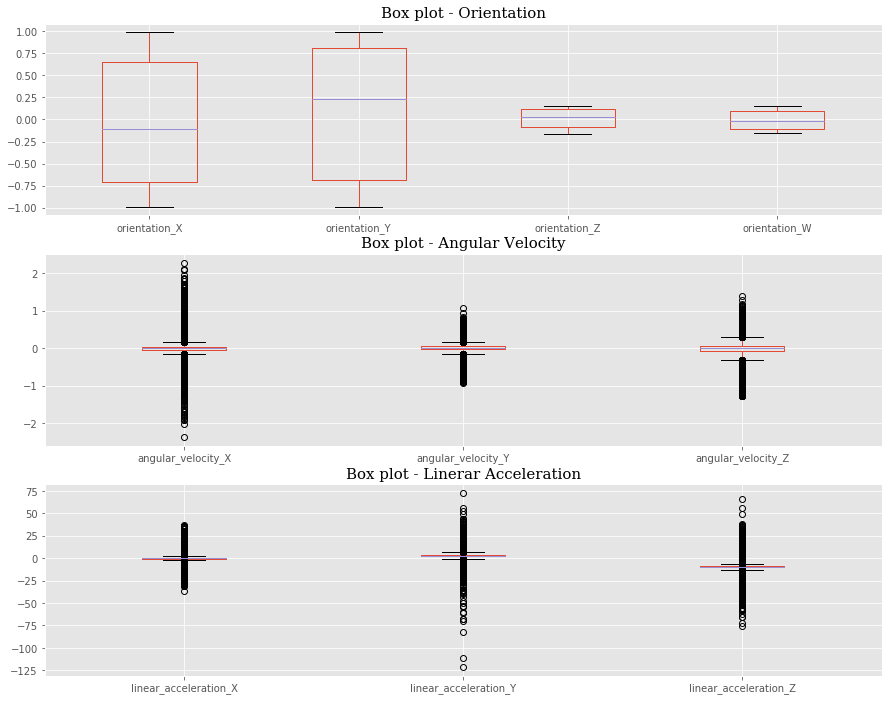

In [20]:
plt.figure(figsize=(15,12))
plt.subplot(3,1,1)
data.boxplot(['orientation_X', 'orientation_Y', 'orientation_Z', 'orientation_W']);
plt.title('Box plot - Orientation', fontsize=15, fontfamily='serif')

plt.subplot(3,1,2)
data.boxplot(['angular_velocity_X', 'angular_velocity_Y', 'angular_velocity_Z']);
plt.title('Box plot - Angular Velocity', fontsize=15, fontfamily='serif')

plt.subplot(3,1,3)
data.boxplot(['linear_acceleration_X', 'linear_acceleration_Y', 'linear_acceleration_Z']);
plt.title('Box plot - Linerar Acceleration', fontsize=15, fontfamily='serif');

**Observation**
- distribution of orientation_X and orientation_Y is higher then distribution of orientation_Z and orientation_W
- Ther are many Outlier in angular velocity and linear acceleration

### Class wise box plot

In [21]:
def box_plot(col):
    sns.boxplot(x="surface", y=col, data=data)
    plt.title('surface vs '+col, fontsize=15, fontfamily='serif')

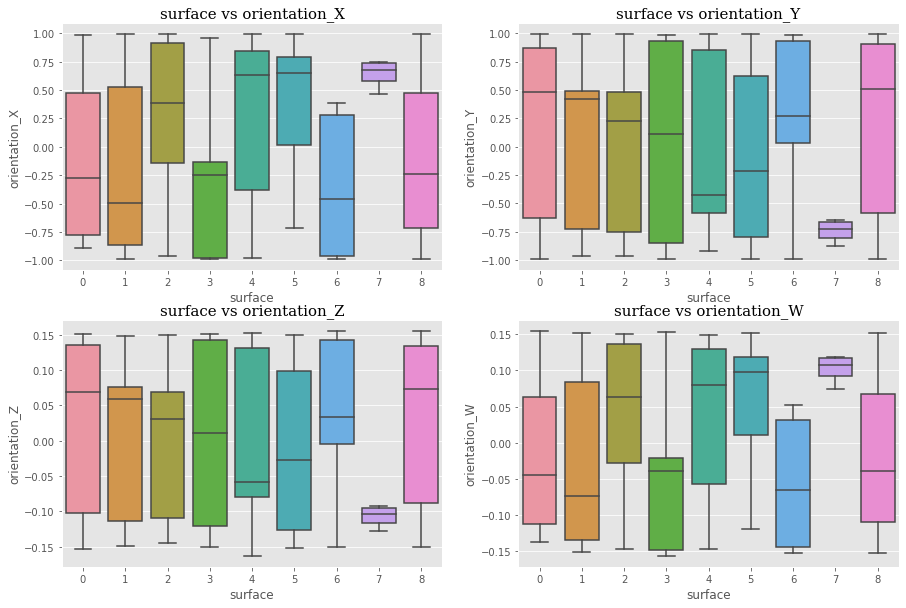

In [22]:
orientatioin_cols = ['orientation_X', 'orientation_Y', 'orientation_Z', 'orientation_W']
i = 1
plt.figure(figsize=(15,10))
for col in orientatioin_cols:
    plt.subplot(2,2, i)
    box_plot(col)
    i+=1

### Observation
**surface vs orientatiion_X :-** 
- Class 7 is easily seperable from calss 6.
- Almost no outlier in any classes.

**surface vs orientatiion_Y :-** 
- All the classes overlap to each other, no clear seperation anomg the classes.

**surface vs orientatiion_Z :-** 
- All the classes overlap to each other, no clear seperation anomg the classes.

**surface vs orientatiion_W :-** 
- Class 7 is easily seperable from calss 6.
- Almost no outlier in any classes.

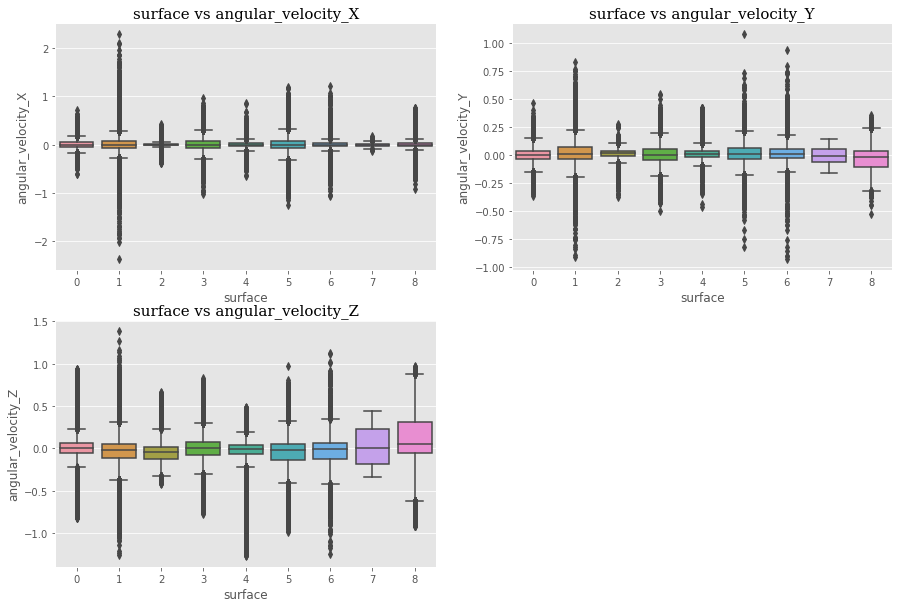

In [23]:
angular_velocity_cols = ['angular_velocity_X', 'angular_velocity_Y', 'angular_velocity_Z']
i = 1
plt.figure(figsize=(15,10))
for col in angular_velocity_cols:
    plt.subplot(2,2, i)
    box_plot(col)
    i+=1

### Observation
**surface vs angular_velocity_X :-** 
- All the classes overlap to each other, no clear seperation anomg the classes.
- Range of class 1 outlier is higher than other classes outlier.

**surface vs angular_velocity_Y :-** 
- All the classes overlap to each other, no clear seperation anomg the classes.

**surface vs angular_velocity_Z :-** 
- All the classes overlap to each other, no clear seperation anomg the classes.
- Inter quantile range of class 7 and 8 are higher than other classes.

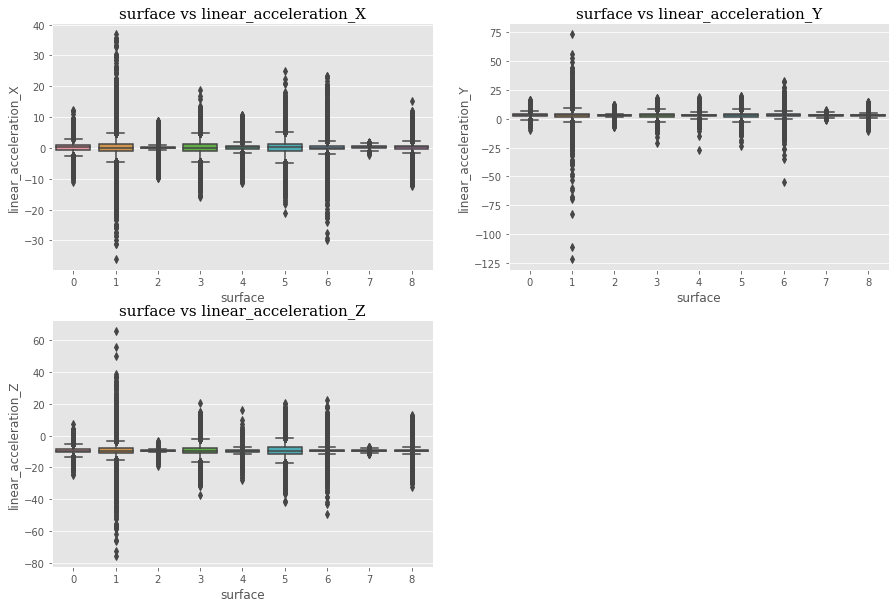

In [24]:
linear_acceleration_cols = ['linear_acceleration_X', 'linear_acceleration_Y', 'linear_acceleration_Z']
i = 1
plt.figure(figsize=(15,10))
for col in linear_acceleration_cols:
    plt.subplot(2,2, i)
    box_plot(col)
    i+=1

### Observation
**surface vs linear_acceleration_X :-** 
- All the classes overlap to each other, no clear seperation anomg the classes.
- Range of class 1 outlier is higher than other classes outlier.

**surface vs linear_acceleration_Y :-** 
- All the classes overlap to each other, no clear seperation anomg the classes.
- Class 1 has hier outlier.

**surface vs linear_acceleration_Z :-** 
- All the classes overlap to each other, no clear seperation anomg the classes.
- Class 1 has higher outlier.

In [25]:
# data['surface'] = data['surface'].map(inverse_labels)

In [26]:
def kde_plot(feature):
    sns.FacetGrid(data, hue="surface", height=4, aspect=3).map(sns.kdeplot, feature);
    plt.title("PDF of "+feature, fontsize=18, fontfamily= 'serif')
    plt.legend();

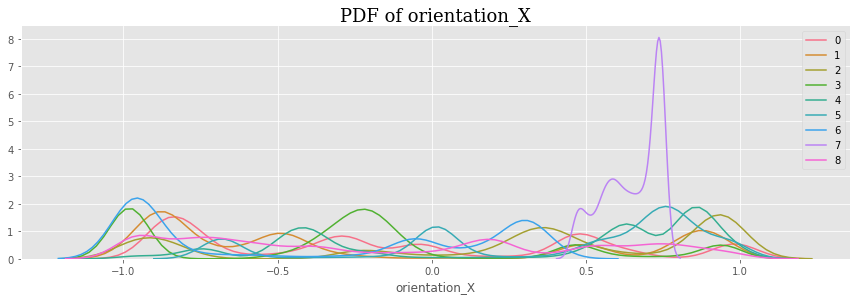

In [27]:
kde_plot('orientation_X')

**Observation :-** orientation_X values varies from -1.5 to +1.5, class 7 values ranges form 0.4 to 0.8, no clear seperation of classes

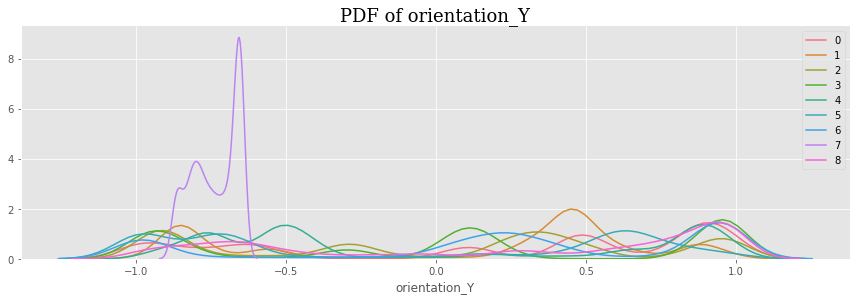

In [28]:
kde_plot('orientation_Y')

**Observation :-** orientation_Y values varies from -1.5 to +1.5, class 7 values ranges form -1.1 to -0.4, no clear seperation of classes

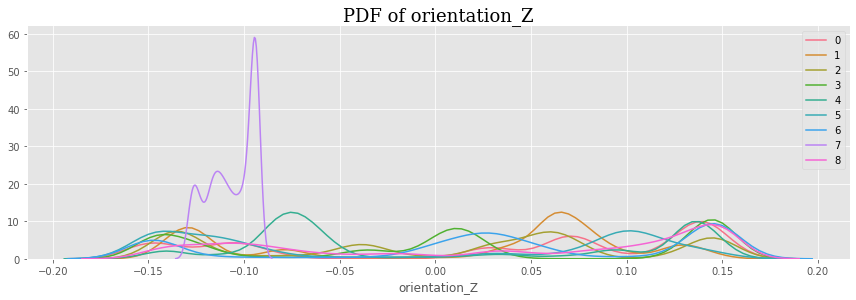

In [29]:
kde_plot('orientation_Z')

**Observation :-** orientation_Z values varies from -0.2 to +0.2, class 7 values ranges form -0.14 to -0.8, no clear seperation of classes.

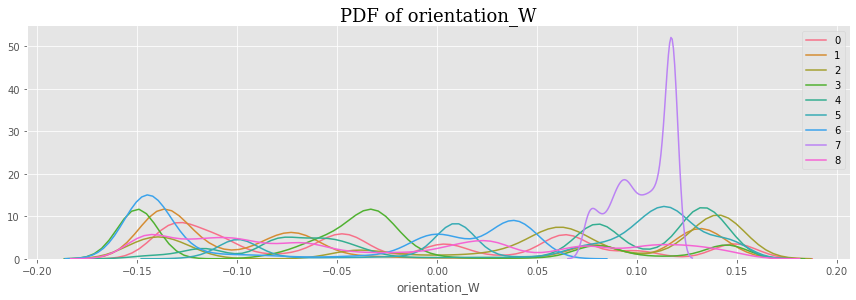

In [30]:
kde_plot('orientation_W')

**Observation :-** orientation_W values varies from -0.2 to +0.2, class 7 values ranges form 0.06 to 0.13, no clear seperation of classes.

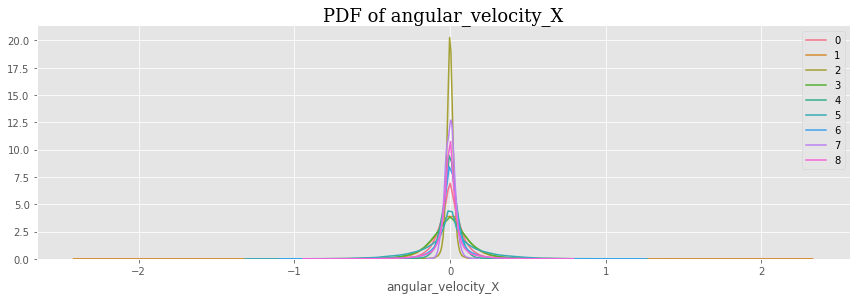

In [31]:
kde_plot('angular_velocity_X')

**Observation :-** angular_velocity_X values varies from -2.5 to +2.5, all classes overlaps to each other, no clear seperation of classes, almost all classes mean are at 0.

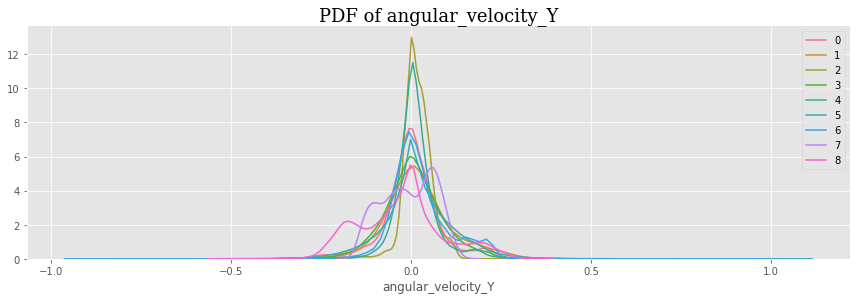

In [32]:
kde_plot('angular_velocity_Y')

**Observation :-** angular_velocity_Y values varies from -1 to +1, all classes overlaps to each other, no clear seperation of classes, almost all classes mean are at near 0.

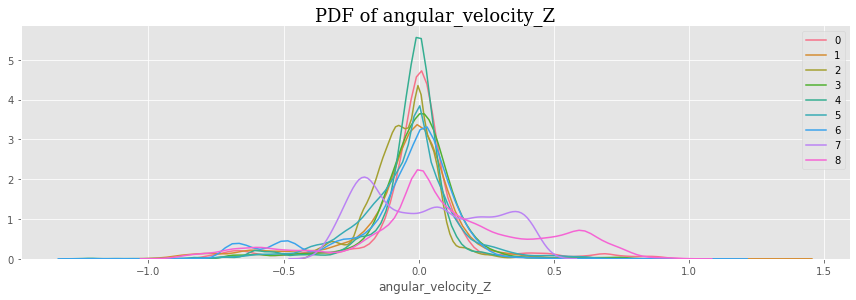

In [33]:
kde_plot('angular_velocity_Z')

**Observation :-** angular_velocity_Z values varies from -1.4 to +1.4, all classes overlaps to each other, no clear seperation of classes, almost all classes mean are at near 0.

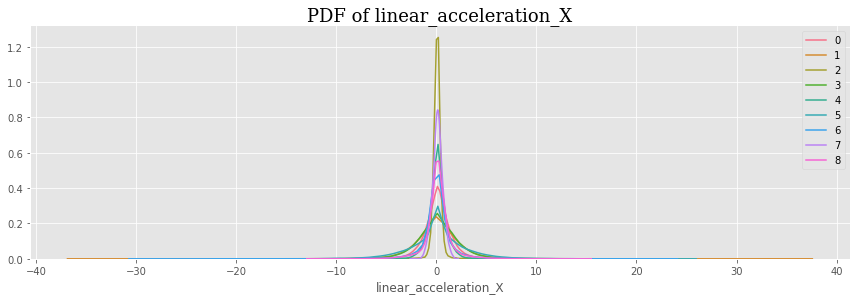

In [34]:
kde_plot('linear_acceleration_X')

**Observation :-** linear_acceleration_X values varies from -40 to +40, all classes overlaps to each other, no clear seperation of classes, almost all classes mean are at near 0, class 3 distribution is higher than other classes.

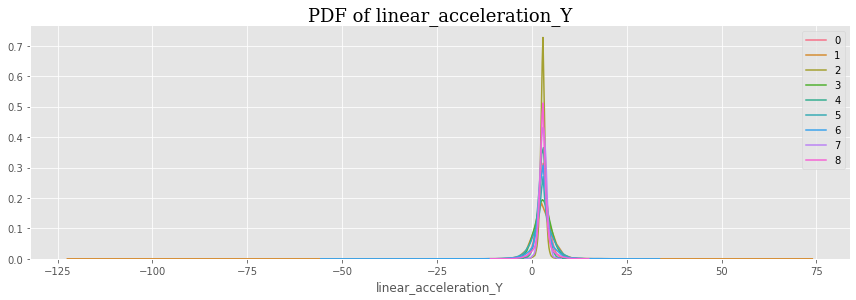

In [35]:
kde_plot('linear_acceleration_Y')

**Observation :-** linear_acceleration_Y values varies from -125 to +75, all classes overlaps to each other, no clear seperation of classes, almost all classes mean are at near 4.

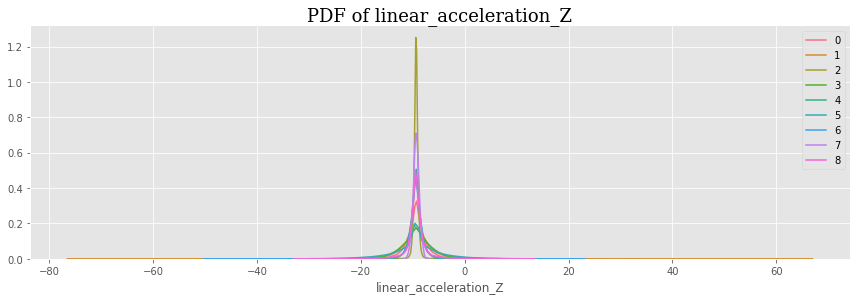

In [36]:
kde_plot('linear_acceleration_Z')

**Observation :-** linear_acceleration_Z values varies from -75 to +70, all classes overlaps to each other, no clear seperation of classes, almost all classes mean are at near -10.

### Visualizing Series

In [37]:
# Let's have a look at the values of features in a single time-series, for example 3rd series with series_id=2
series_id = 2

print('surface type of series_id = {} is {}'.format(series_id, y_train[y_train['series_id']==series_id].iloc[0,-1]))

data[data['series_id']==series_id][cols].describe().T

surface type of series_id = 2 is concrete


,count,mean,std,min,25%,50%,75%,max
orientation_X,128.0,-0.512057,0.001377,-0.514340,-0.513110,-0.512035,-0.510947,-0.509440
orientation_Y,128.0,-0.846171,0.000785,-0.847790,-0.846713,-0.846210,-0.845502,-0.844900
orientation_Z,128.0,-0.129371,0.000541,-0.130300,-0.129830,-0.129405,-0.128790,-0.128520
orientation_W,128.0,-0.071082,0.000278,-0.071535,-0.071302,-0.071139,-0.070904,-0.070378
angular_velocity_X,128.0,0.002646,0.060168,-0.152710,-0.045363,-0.003120,0.047278,0.141920
angular_velocity_Y,128.0,-0.009232,0.035530,-0.107810,-0.027645,-0.010880,0.011000,0.091946
angular_velocity_Z,128.0,0.027989,0.021866,-0.015697,0.012173,0.028323,0.043664,0.088730
linear_acceleration_X,128.0,0.149711,0.756138,-2.593000,-0.314748,0.174515,0.684435,1.853300
linear_acceleration_Y,128.0,2.886745,1.769792,-1.254000,1.860475,3.033750,4.082600,6.210500
linear_acceleration_Z,128.0,-9.395783,1.140267,-12.499000,-10.046750,-9.374400,-8.596125,-5.744200


In [38]:
@interact(s_id=(0, len(y_train)))
def visualize_series(s_id=2):
    s_df = data[data['series_id']==s_id]
    plt.figure(figsize=(28,16))
    k = 1
    color = {'o':'g','a':'r','l':'b'}
    for col in cols:
        plt.subplot(3,4, k)
        plt.plot(s_df[col], c=color[col[0]])
        plt.title(col, fontsize=18, fontfamily= 'serif')
        k+=1
        if k==8 or k==12:
            k+=1

interactive(children=(IntSlider(value=2, description='s_id', max=3810), Output()), _dom_classes=('widget-inter…

**Observation for series_id=2:-** 
- orientation_X is decreasing
- orientation_Y is increasing
- No special pattern in other graphs
- series_id 2 class is of concrete type

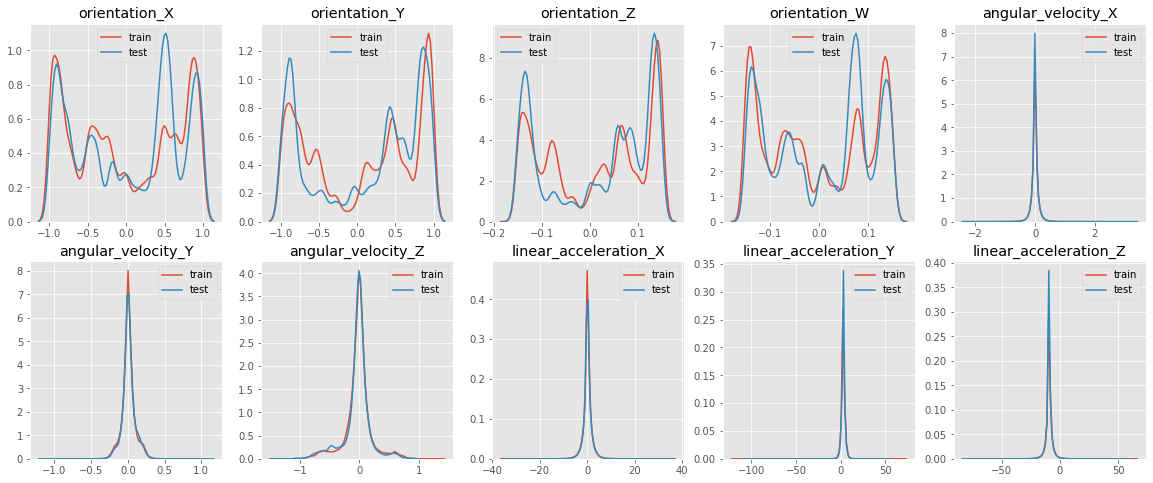

In [39]:
# checking the train and test data distribution.
k=1
plt.figure(figsize=(20,8))
for col in cols:
    plt.subplot(2,5,k)
    sns.kdeplot(X_train[col], label='train')
    sns.kdeplot(X_test[col], label='test')
    plt.title(col)
    k+=1

**Observation:-** distribution of train and test data are almost same, only there is a mimute variation in Orientation feature.

# Bivariate Analysis

In [40]:
def correlation_plot(data, title=''):
    plt.figure(figsize=(12,7))
    plt.subplot(111)
    sns.heatmap(data, annot=True, fmt='.2f', linewidths=0.05, cmap='Blues', robust=True);
    plt.subplots_adjust(top=0.8)
    plt.xticks(rotation=60)
    plt.title(title);
    plt.show()

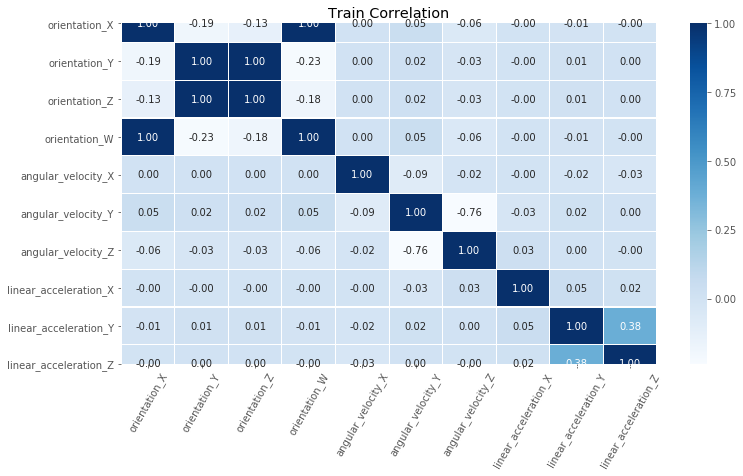

In [41]:
correlation_plot(X_train[cols].corr(), 'Train Correlation')

**Observation:-**
- Orientation_W and Orientation_X are highly correlated.
- Orientation_Z and Orientation_Y are highly correlated.
- Angular_velocity_Z and Angular_velocity_Y are also correlated.

**Note** highly correlated features can be dropped, leaving only one featre

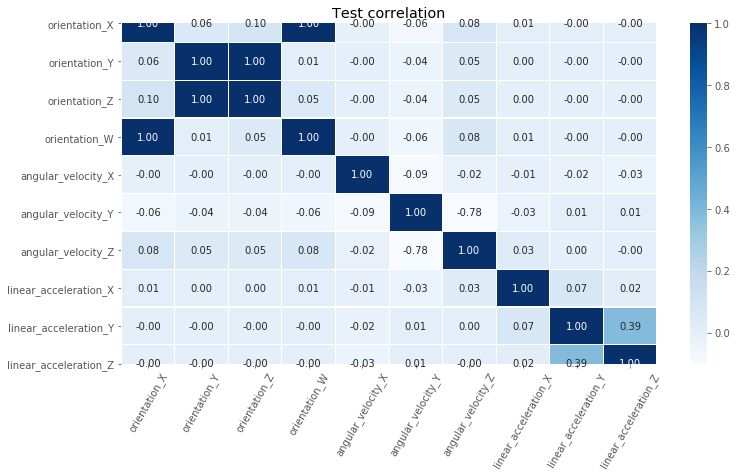

In [42]:
correlation_plot(X_test[cols].corr(), 'Test correlation')

**Observation:-** correlation of test data is almost same as of train data

In [43]:
# # Lets find the correlation of each feature with target 'surface'
# data['surface'] = y_train['surface']
# surface_corr = pd.DataFrame(data[cols+['surface']].phik_matrix()['surface'], columns=['surface'])
# surface_corr

**Observation:-** Orientation_X is highly correlated and linear_acceleration_Z is least correlated with surface

# Feature Engineering
<a href='http://help-robots.herokuapp.com/'>Click Here</a> to check its deployment

In [44]:
def resultant(x,y,z=0,w=0):
    return (x**2 + y**2 + z**2 + w**2)**0.5

def quaternion_to_euler_angle(q0, q1, q2, q3):
    a = 2*(q0*q1 + q2*q3)
    b = 1 - 2*(q1*q1 + q2*q2)
    t1 = np.arctan2(a,b)
    
    t2 = 2*(q0*q2 - q3*q1)
    
    c = 2*(q0*q3 + q1*q2)
    d = 1 - 2*(q2*q2 + q3*q3)
    t3 = np.arctan2(c,d)
    return pd.concat((t1, t2, t3), axis=1)

from scipy.stats import entropy
def Entropy(x):
    return entropy(x.value_counts()/len(x))
#     return entropy(x)
    
def feature_engg(data_X):
    data_X = data_X.drop(['row_id', 'measurement_number'], axis=1)
    
    data_X.fillna(0,inplace=True)
    data_X.replace(-np.inf,0,inplace=True)
    data_X.replace(np.inf,0,inplace=True)
    
    data_X["resultant_angular_velocity"] = resultant(data_X["angular_velocity_X"], data_X["angular_velocity_Y"],\
                                                     data_X["angular_velocity_Z"])
    data_X["resultant_linear_acceleration"] = resultant(data_X["linear_acceleration_X"], data_X["linear_acceleration_Y"],\
                                                        data_X["linear_acceleration_Z"])
#     data_X["resultant_orientation"] = resultant(data_X["orientation_W"],data_X["orientation_X"],data_X["orientation_Y"],\
#                                                 data_X["orientation_Z"])
    
    data_X[["euler_t1", "euler_t2", "euler_t3"]] = quaternion_to_euler_angle(data_X['orientation_W'], data_X['orientation_X'],\
                                                                             data_X['orientation_Y'], data_X['orientation_Z'])

    new_df = pd.DataFrame()

    funct1 = {'min':'min()','max':'max()','mean':'mean()','std':'std()', 'median':'median()', 'mad':'mad()', \
              'quantile25':'quantile(0.25)', 'quantile75':'quantile(0.75)', 'skewness':'skew()'}
#     funct1 = {'min':'min()'}
    for op in funct1:
        df = eval('data_X.groupby(["series_id"]).{}'.format(funct1[op]))
        df.columns = df.columns.map(lambda x: x+'_'+op)
        new_df = pd.concat([new_df, df], axis=1)
        
    for col in data_X.columns:
        if col not in ['row_id', 'series_id', 'measurement_number']:
            new_df[col + '_kurtosis'] = data_X.groupby('series_id')[col].apply(lambda x: x.kurtosis())
            new_df[col + '_abs_max'] = data_X.groupby('series_id')[col].apply(lambda x: np.max(np.abs(x)))
            new_df[col + '_abs_min'] = data_X.groupby('series_id')[col].apply(lambda x: np.min(np.abs(x)))            
            new_df[col + '_energy'] = data_X.groupby('series_id')[col].apply(lambda x: sum(x**2)/len(x))
            new_df[col + '_mean_abs_change'] = data_X.groupby('series_id')[col].apply(lambda x: np.mean(np.abs(np.diff(x))))
            new_df[col + '_mean_change_of_abs_change'] = data_X.groupby('series_id')[col].apply(lambda x: \
                                                                                        np.mean(np.diff(np.abs(np.diff(x)))))
            new_df[col + '_max_to_min'] = new_df[col + '_max'] / new_df[col + '_min']
#             new_df[col + '_entropy'] = data_X.groupby('series_id')[col].apply(Entropy)
    
    return new_df

In [45]:
new_df = feature_engg(X_train)

print(new_df.shape)
new_df.head()

(3810, 240)


,orientation_X_min,orientation_Y_min,orientation_Z_min,orientation_W_min,angular_velocity_X_min,angular_velocity_Y_min,angular_velocity_Z_min,linear_acceleration_X_min,linear_acceleration_Y_min,linear_acceleration_Z_min,...,euler_t2_mean_abs_change,euler_t2_mean_change_of_abs_change,euler_t2_max_to_min,euler_t3_kurtosis,euler_t3_abs_max,euler_t3_abs_min,euler_t3_energy,euler_t3_mean_abs_change,euler_t3_mean_change_of_abs_change,euler_t3_max_to_min
series_id,,,,,,,,,,,,,,,,,,,,,
0,-0.75953,-0.63456,-0.106140,-0.107050,-0.16041,-0.079404,-0.030181,-1.8644,0.075417,-12.512,...,0.000065,5.650492e-07,0.913452,-0.775047,1.397402,1.393233,1.948916,0.000051,1.602451e-07,1.002992
1,-0.95896,0.24074,0.030504,-0.148090,-0.25480,-0.134330,-0.121610,-3.1934,-2.149200,-16.928,...,0.000087,3.393651e-10,0.754539,-0.519186,0.494641,0.490164,0.242785,0.000147,1.303804e-07,0.990949
2,-0.51434,-0.84779,-0.130300,-0.071535,-0.15271,-0.107810,-0.015697,-2.5930,-1.254000,-12.499,...,0.000067,-2.355603e-07,0.926279,-1.046375,2.061288,2.049684,4.223123,0.000097,-8.169853e-07,1.005661
3,-0.93968,0.30943,0.037922,-0.144370,-0.40152,-0.168150,-0.073414,-3.7934,-5.825100,-19.845,...,0.000085,-1.049645e-06,0.932945,1.230665,0.638340,0.634294,0.404059,0.000071,9.790398e-08,0.993661
4,-0.89689,0.41646,0.058247,-0.137320,-0.10407,0.008231,-0.213940,-1.2696,0.342070,-10.975,...,0.000028,2.090554e-07,0.918153,-1.151162,0.915040,0.867983,0.799690,0.000371,4.805791e-07,0.948575


In [46]:
# new_df.tail()

In [47]:
print('Number of Features: ', len(new_df.columns), '  and the new features are: ')
print('-'*50)
for i in (new_df.columns):
    print(i)

Number of Features:  240   and the new features are: 
--------------------------------------------------
orientation_X_min
orientation_Y_min
orientation_Z_min
orientation_W_min
angular_velocity_X_min
angular_velocity_Y_min
angular_velocity_Z_min
linear_acceleration_X_min
linear_acceleration_Y_min
linear_acceleration_Z_min
resultant_angular_velocity_min
resultant_linear_acceleration_min
euler_t1_min
euler_t2_min
euler_t3_min
orientation_X_max
orientation_Y_max
orientation_Z_max
orientation_W_max
angular_velocity_X_max
angular_velocity_Y_max
angular_velocity_Z_max
linear_acceleration_X_max
linear_acceleration_Y_max
linear_acceleration_Z_max
resultant_angular_velocity_max
resultant_linear_acceleration_max
euler_t1_max
euler_t2_max
euler_t3_max
orientation_X_mean
orientation_Y_mean
orientation_Z_mean
orientation_W_mean
angular_velocity_X_mean
angular_velocity_Y_mean
angular_velocity_Z_mean
linear_acceleration_X_mean
linear_acceleration_Y_mean
linear_acceleration_Z_mean
resultant_angular_ve

In [48]:
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index, perplexity in enumerate(perplexities):
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(perplexity=perplexity).fit_transform(X_data)
        
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8, palette="Set1")
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        plt.show()


performing tsne with perplexity 2 and with 1000 iterations at max


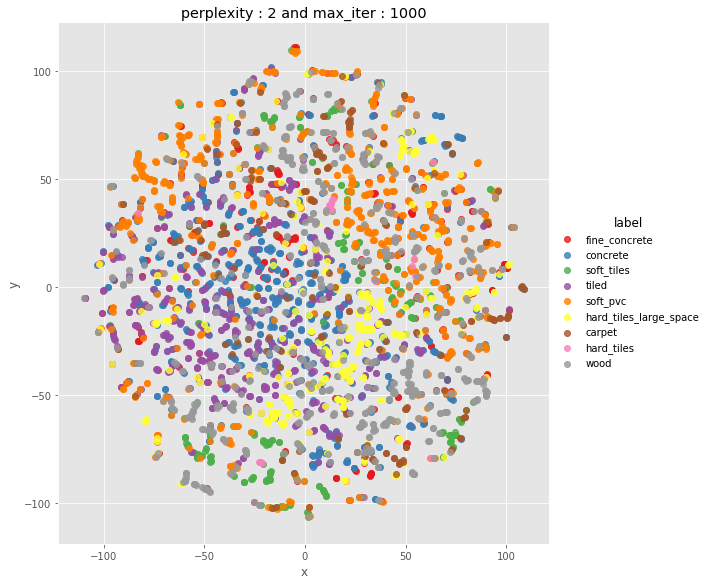


performing tsne with perplexity 5 and with 1000 iterations at max


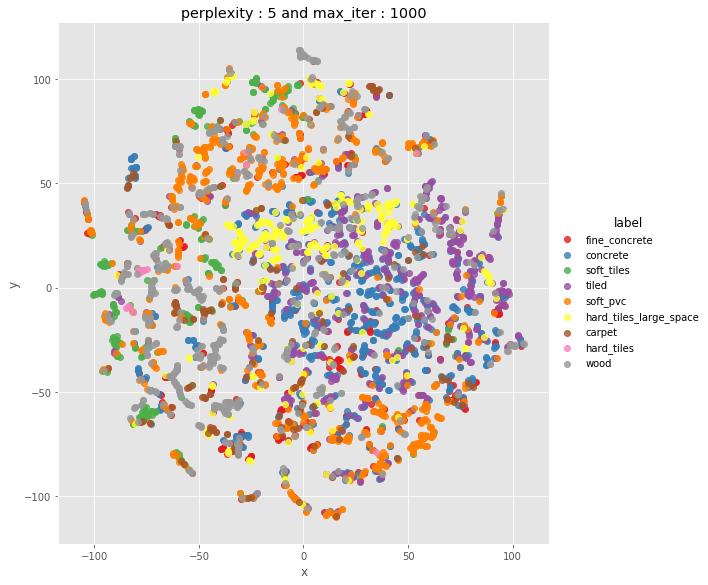


performing tsne with perplexity 10 and with 1000 iterations at max


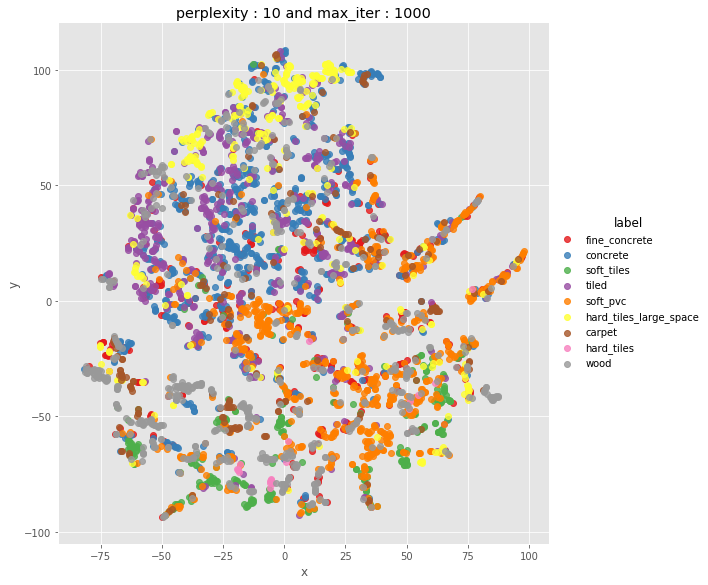


performing tsne with perplexity 20 and with 1000 iterations at max


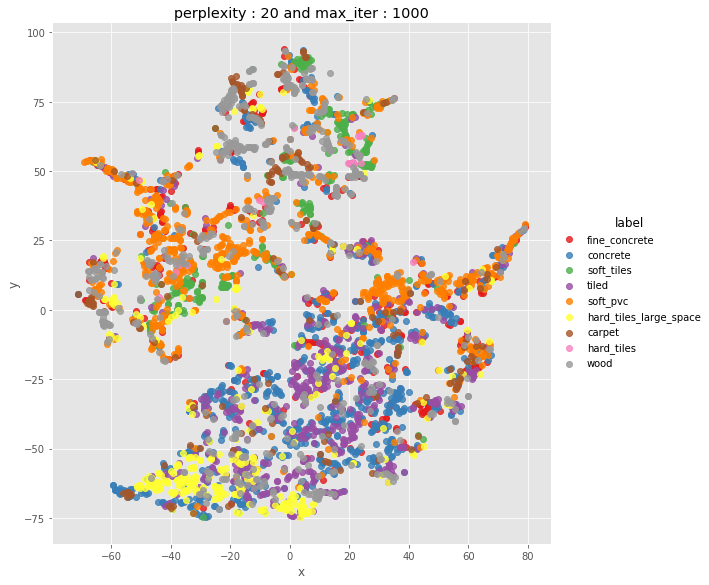


performing tsne with perplexity 50 and with 1000 iterations at max


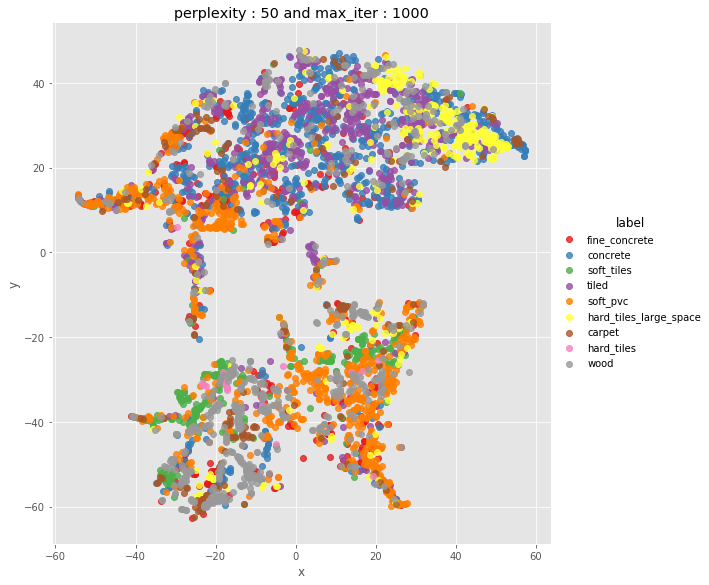

In [49]:
perform_tsne(X_data = new_df, y_data=y_train['surface'], perplexities =[2,5,10,20,50])


**Observation:-** Data are not linearly seperable

# Dividing data into Train and Test

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_df, y_train['surface'], test_size=0.2, random_state=42)
print('Train shape: ', X_train.shape, y_train.shape) 
print('Test  shape:', X_test.shape, y_test.shape)

Train shape:  (3048, 240) (3048,)
Test  shape: (762, 240) (762,)


# Scaling the data (Standardizing)

In [51]:
from sklearn.preprocessing import StandardScaler
sk = StandardScaler()
X_train = sk.fit_transform(X_train)
X_test = sk.transform(X_test)
print('Train shape: ', X_train.shape, y_train.shape) 
print('Test  shape:', X_test.shape, y_test.shape)

Train shape:  (3048, 240) (3048,)
Test  shape: (762, 240) (762,)


In [68]:
pickle.dump(sk, open('scaler.pkl', 'wb'))

# Let's model with our data

### Labels that are useful in plotting confusion matrix

In [52]:
labels=['concrete', 'soft_pvc', 'wood','tiled', 'fine_concrete', 'hard_tiles_large_space', 'soft_tiles', 'carpet', 'hard_tiles']

### Function to plot the confusion matrix

In [53]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Generic function to run any model specified

In [54]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True,print_cm=True,cm_cmap=plt.cm.Greens):
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

### Method to print the gridsearch Attributes

In [55]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

In [56]:
warnings.filterwarnings("ignore")
# warnings.filterwarnings("ignore", category=DeprecationWarning)

# 1. Logistic Regression with Grid Search
<a href='http://help-robots.herokuapp.com/'>Click Here</a> to check its deployment

In [32]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

training the model..
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    2.3s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:03.001575


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.001079


---------------------
|      Accuracy      |
---------------------

    0.6771653543307087


--------------------
| Confusion Matrix |
--------------------

 [[ 23   8   2   0   2   1   2   0   9]
 [  3 135   6   0   8   5   1   6   8]
 [  1   5  30   0   1   8   3   4  13]
 [  0   0   0   0   0   3   2   0   0]
 [  0  11   3   0  32   1   4  10   2]
 [  3   9   5   0   0 114   3   0   7]
 [  0   2   0   0   0   7  53   0   1]
 [  2   7   1   0   4   6   0  66   3]
 [  3  10   3   0   1  23   1  13  63]]


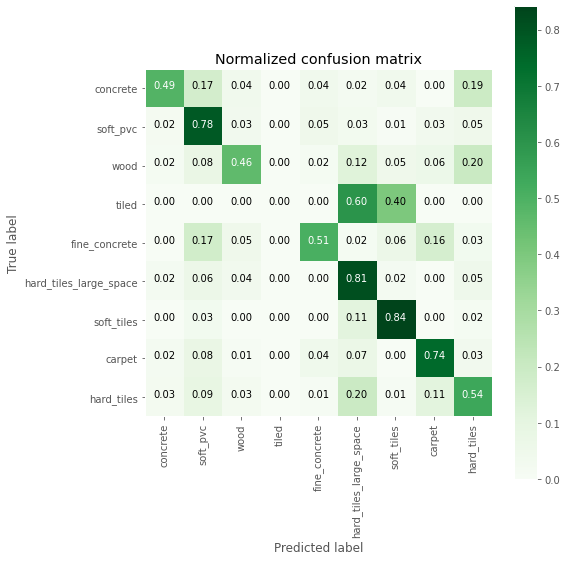

-------------------------
| Classifiction Report |
-------------------------
                        precision    recall  f1-score   support

                carpet       0.66      0.49      0.56        47
              concrete       0.72      0.78      0.75       172
         fine_concrete       0.60      0.46      0.52        65
            hard_tiles       0.00      0.00      0.00         5
hard_tiles_large_space       0.67      0.51      0.58        63
              soft_pvc       0.68      0.81      0.74       141
            soft_tiles       0.77      0.84      0.80        63
                 tiled       0.67      0.74      0.70        89
                  wood       0.59      0.54      0.57       117

              accuracy                           0.68       762
             macro avg       0.59      0.57      0.58       762
          weighted avg       0.67      0.68      0.67       762



In [ ]:
# start Grid search
parameters = {'C':[0.1, 10, 30]}


log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)


In [ ]:
# plt.figure(figsize=(8,8))
# plt.grid(b=False)
# plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
# plt.show()

In [ ]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.1}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.6643700787401575



#  2. Linear SVC with GridSearch
<a href='http://help-robots.herokuapp.com/'>Click Here</a> to check its deployment

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:01:19.536896


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.002860


---------------------
|      Accuracy      |
---------------------

    0.699475065616798


--------------------
| Confusion Matrix |
--------------------

 [[ 24   7   1   0   1   2   1   4   7]
 [  1 130   6   0   9   8   1   8   9]
 [  3   3  32   0   2   8   0   2  15]
 [  0   0   0   0   0   3   1   0   1]
 [  0  10   1   0  44   1   3   4   0]
 [  2   6   5   1   0 118   2   0   7]
 [  0   1   0   1   0   4  55   2   0]
 [  2   2   2   0   3   4   0  73   3]
 [  4  11   3   0   2  23   2  15  57]]


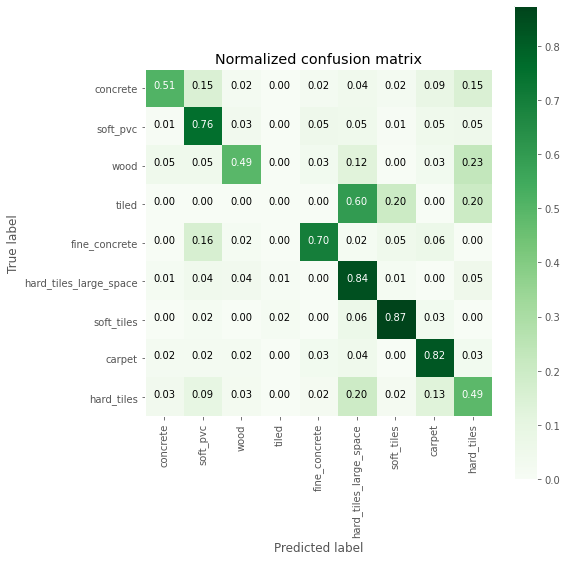

-------------------------
| Classifiction Report |
-------------------------
                        precision    recall  f1-score   support

                carpet       0.67      0.51      0.58        47
              concrete       0.76      0.76      0.76       172
         fine_concrete       0.64      0.49      0.56        65
            hard_tiles       0.00      0.00      0.00         5
hard_tiles_large_space       0.72      0.70      0.71        63
              soft_pvc       0.69      0.84      0.76       141
            soft_tiles       0.85      0.87      0.86        63
                 tiled       0.68      0.82      0.74        89
                  wood       0.58      0.49      0.53       117

              accuracy                           0.70       762
             macro avg       0.62      0.61      0.61       762
          weighted avg       0.69      0.70      0.69       762



In [ ]:
from sklearn.svm import LinearSVC

parameters = {'C':[0.1, 1, 2, 8]}
lr_svc = LinearSVC()
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.7139217744757598



# 3.  Kernel SVM with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:02:01.826672


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.607598


---------------------
|      Accuracy      |
---------------------

    0.8805774278215223


--------------------
| Confusion Matrix |
--------------------

 [[ 35   9   0   0   0   1   1   0   1]
 [  0 159   1   0   1   4   1   0   6]
 [  0   7  50   0   1   2   1   1   3]
 [  0   0   0   4   0   1   0   0   0]
 [  0   4   0   0  58   0   0   0   1]
 [  0   2   1   0   1 129   2   0   6]
 [  0   2   0   0   0   1  60   0   0]
 [  0   3   0   0   0   1   0  81   4]
 [  2   6   1   0   2   3   0   8  95]]


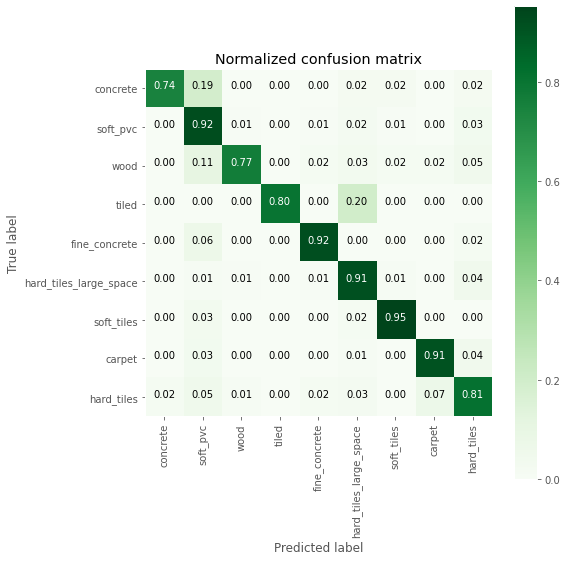

-------------------------
| Classifiction Report |
-------------------------
                        precision    recall  f1-score   support

                carpet       0.95      0.74      0.83        47
              concrete       0.83      0.92      0.87       172
         fine_concrete       0.94      0.77      0.85        65
            hard_tiles       1.00      0.80      0.89         5
hard_tiles_large_space       0.92      0.92      0.92        63
              soft_pvc       0.91      0.91      0.91       141
            soft_tiles       0.92      0.95      0.94        63
                 tiled       0.90      0.91      0.91        89
                  wood       0.82      0.81      0.82       117

              accuracy                           0.88       762
             macro avg       0.91      0.86      0.88       762
          weighted avg       0.88      0.88      0.88       762



In [ ]:
from sklearn.svm import SVC
parameters = {'C':[0.1, 1, 10,20], 'gamma': [0.0001, 0.005, 0.125]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 20, 'gamma': 0.005}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.861551589544806



# 4. Decision Trees with GridSearchCV

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:16.380449


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.002259


---------------------
|      Accuracy      |
---------------------

    0.7742782152230971


--------------------
| Confusion Matrix |
--------------------

 [[ 25  10   0   0   0   3   4   0   5]
 [  0 141   6   0   5   5   2   7   6]
 [  0   6  44   0   0   5   1   2   7]
 [  0   0   0   2   0   1   0   0   2]
 [  2   6   2   0  48   0   0   1   4]
 [  0   9   6   1   0 115   2   0   8]
 [  2   2   0   0   0   2  55   0   2]
 [  0   9   2   0   1   1   0  73   3]
 [  3   1   6   0   0  12   0   8  87]]


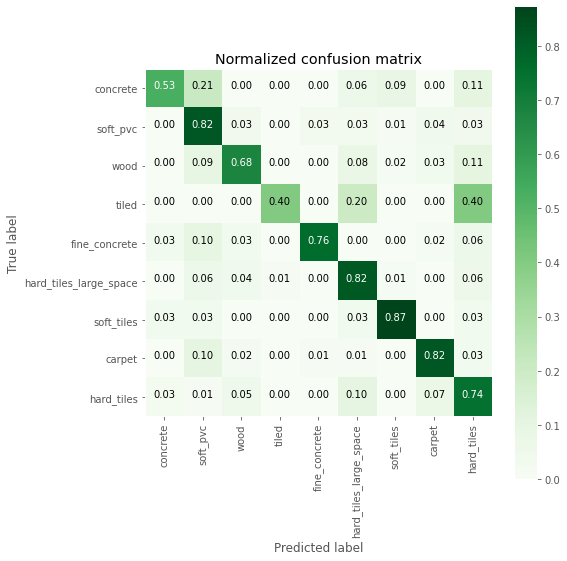

-------------------------
| Classifiction Report |
-------------------------
                        precision    recall  f1-score   support

                carpet       0.78      0.53      0.63        47
              concrete       0.77      0.82      0.79       172
         fine_concrete       0.67      0.68      0.67        65
            hard_tiles       0.67      0.40      0.50         5
hard_tiles_large_space       0.89      0.76      0.82        63
              soft_pvc       0.80      0.82      0.81       141
            soft_tiles       0.86      0.87      0.87        63
                 tiled       0.80      0.82      0.81        89
                  wood       0.70      0.74      0.72       117

              accuracy                           0.77       762
             macro avg       0.77      0.72      0.74       762
          weighted avg       0.78      0.77      0.77       762

--------------------------
|      Best Estimator     |
--------------------------

	Deci

In [ ]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'max_depth':np.arange(7,20,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

# 5. Random Forest Classifier with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:45.192441


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.052923


---------------------
|      Accuracy      |
---------------------

    0.916010498687664


--------------------
| Confusion Matrix |
--------------------

 [[ 33   7   0   0   0   1   2   0   4]
 [  0 162   2   0   1   1   1   0   5]
 [  0   5  51   0   0   1   1   2   5]
 [  0   0   0   3   0   0   0   0   2]
 [  1   1   1   0  56   0   0   0   4]
 [  0   0   1   0   1 137   0   0   2]
 [  0   2   0   0   0   0  60   0   1]
 [  0   4   0   0   0   0   0  84   1]
 [  1   1   0   0   0   2   0   1 112]]


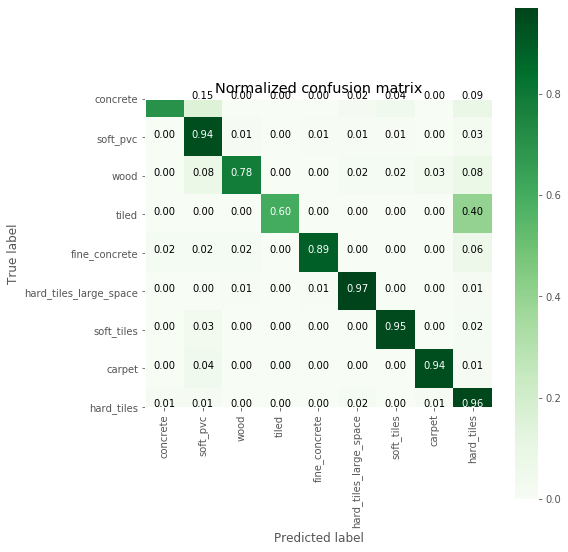

-------------------------
| Classifiction Report |
-------------------------
                        precision    recall  f1-score   support

                carpet       0.94      0.70      0.80        47
              concrete       0.89      0.94      0.92       172
         fine_concrete       0.93      0.78      0.85        65
            hard_tiles       1.00      0.60      0.75         5
hard_tiles_large_space       0.97      0.89      0.93        63
              soft_pvc       0.96      0.97      0.97       141
            soft_tiles       0.94      0.95      0.94        63
                 tiled       0.97      0.94      0.95        89
                  wood       0.82      0.96      0.89       117

             micro avg       0.92      0.92      0.92       762
             macro avg       0.94      0.86      0.89       762
          weighted avg       0.92      0.92      0.91       762

--------------------------
|      Best Estimator     |
--------------------------

	Rand

In [60]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

# 6.  Gradient Boosted Decision Trees With GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:28:39.207849


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.046869


---------------------
|      Accuracy      |
---------------------

    0.9081364829396326


--------------------
| Confusion Matrix |
--------------------

 [[ 35   7   0   0   0   0   0   0   5]
 [  0 164   2   0   0   2   1   0   3]
 [  0   3  52   0   1   2   0   3   4]
 [  0   0   0   2   0   0   0   0   3]
 [  1   5   0   0  56   0   0   0   1]
 [  0   2   1   0   0 136   0   0   2]
 [  0   4   0   0   0   0  58   0   1]
 [  0   4   1   0   0   1   1  80   2]
 [  0   3   0   0   0   4   0   1 109]]


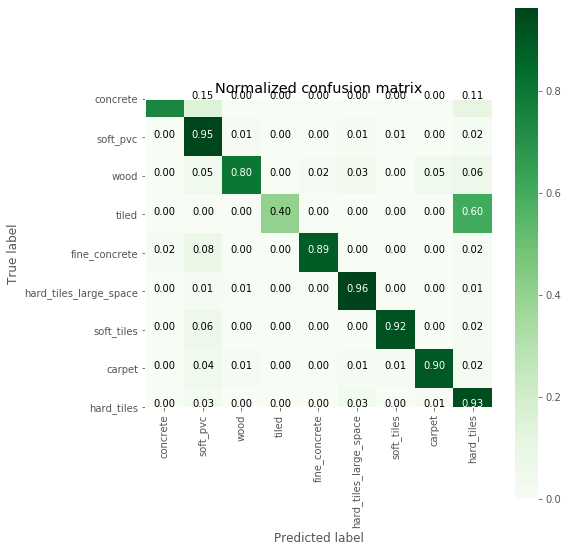

-------------------------
| Classifiction Report |
-------------------------
                        precision    recall  f1-score   support

                carpet       0.97      0.74      0.84        47
              concrete       0.85      0.95      0.90       172
         fine_concrete       0.93      0.80      0.86        65
            hard_tiles       1.00      0.40      0.57         5
hard_tiles_large_space       0.98      0.89      0.93        63
              soft_pvc       0.94      0.96      0.95       141
            soft_tiles       0.97      0.92      0.94        63
                 tiled       0.95      0.90      0.92        89
                  wood       0.84      0.93      0.88       117

             micro avg       0.91      0.91      0.91       762
             macro avg       0.94      0.83      0.87       762
          weighted avg       0.91      0.91      0.91       762

--------------------------
|      Best Estimator     |
--------------------------

	Grad

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth':[2,3,5,7], 'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(gbdt_grid_results['model'])

# 7. XgBoost

training the model..
[11:08:17] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Done 
 

training_time(HH:MM:SS.ms) - 0:03:31.626814


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.031221


---------------------
|      Accuracy      |
---------------------

    0.9146981627296588


--------------------
| Confusion Matrix |
--------------------

 [[ 36   8   0   0   0   0   0   0   3]
 [  0 162   2   0   0   2   1   0   5]
 [  0   4  48   0   1   1   1   3   7]
 [  0   0   0   2   0   0   0   0   3]
 [  1   1   0   0  60   0   0   1   0]
 [  0   0   1   0   1 138   0   0   1]
 [  0   3   0   0   0   0  59   0   1]
 [  0   1   0   0   0   3   1  83   1]
 [  0   3   1   1   0   1   0   2 109]]


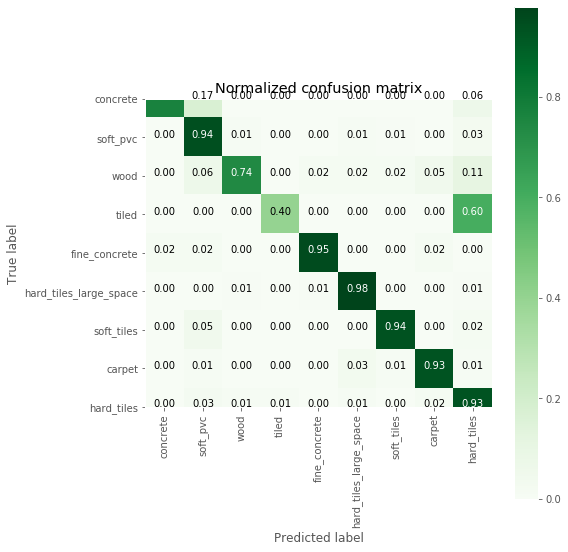

-------------------------
| Classifiction Report |
-------------------------
                        precision    recall  f1-score   support

                carpet       0.97      0.77      0.86        47
              concrete       0.89      0.94      0.92       172
         fine_concrete       0.92      0.74      0.82        65
            hard_tiles       0.67      0.40      0.50         5
hard_tiles_large_space       0.97      0.95      0.96        63
              soft_pvc       0.95      0.98      0.97       141
            soft_tiles       0.95      0.94      0.94        63
                 tiled       0.93      0.93      0.93        89
                  wood       0.84      0.93      0.88       117

             micro avg       0.91      0.91      0.91       762
             macro avg       0.90      0.84      0.86       762
          weighted avg       0.92      0.91      0.91       762

--------------------------
|      Best Estimator     |
--------------------------

	XGBC

In [62]:
from xgboost import XGBClassifier
param_grid = {'max_depth': np.arange(9,10,2), 'n_estimators':np.arange(500,600,100)}
xgb_clf = XGBClassifier(n_jobs=-1, num_class=9, use_label_encoder=True)

xgb_grid = GridSearchCV(xgb_clf, param_grid=param_grid, n_jobs=-1)
xgb_grid_results = perform_model(xgb_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(xgb_grid_results['model'])

# 8. Guassian Naive Bayes

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:08.847598


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.010969


---------------------
|      Accuracy      |
---------------------

    0.42782152230971127


--------------------
| Confusion Matrix |
--------------------

 [[ 1  7  3  0  1  6 16  6  7]
 [ 2 23 27  0 10  3  1 94 12]
 [ 1  1 29  1  1 11  8  5  8]
 [ 0  0  0  5  0  0  0  0  0]
 [ 1  5  1  0 27  9  7 10  3]
 [ 0  0 11  0  2 99 19  1  9]
 [ 0  1  0  2  2  4 54  0  0]
 [ 1  2 14  0  4  1  1 61  5]
 [ 0  5  4  7  5 29 17 23 27]]


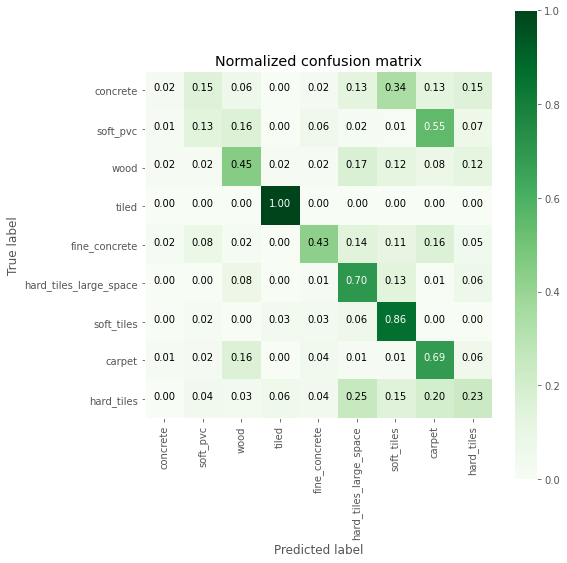

-------------------------
| Classifiction Report |
-------------------------
                        precision    recall  f1-score   support

                carpet       0.17      0.02      0.04        47
              concrete       0.52      0.13      0.21       172
         fine_concrete       0.33      0.45      0.38        65
            hard_tiles       0.33      1.00      0.50         5
hard_tiles_large_space       0.52      0.43      0.47        63
              soft_pvc       0.61      0.70      0.65       141
            soft_tiles       0.44      0.86      0.58        63
                 tiled       0.30      0.69      0.42        89
                  wood       0.38      0.23      0.29       117

              accuracy                           0.43       762
             macro avg       0.40      0.50      0.39       762
          weighted avg       0.44      0.43      0.39       762

--------------------------
|      Best Estimator     |
--------------------------

	Gaus

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gnb_grid = GridSearchCV(gnb, param_grid=params_NB, n_jobs=-1)

gnb_grid_results = perform_model(gnb_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(gnb_grid_results['model'])

# gnb_results = perform_model(gnb, X_train, y_train, X_test, y_test, class_labels=labels)

# 9. CatBoost Classifier

In [ ]:
# !pip install catboost

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:01:46.339921


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.093718


---------------------
|      Accuracy      |
---------------------

    0.9304461942257218


--------------------
| Confusion Matrix |
--------------------

 [[ 34   7   0   0   0   0   1   0   5]
 [  0 164   2   0   0   1   1   1   3]
 [  0   6  55   0   0   0   0   2   2]
 [  0   0   0   4   0   0   0   0   1]
 [  0   1   0   0  60   0   0   0   2]
 [  0   0   1   0   1 137   0   0   2]
 [  0   2   0   0   0   0  60   0   1]
 [  0   1   0   0   0   0   1  83   4]
 [  1   1   0   0   0   2   0   1 112]]


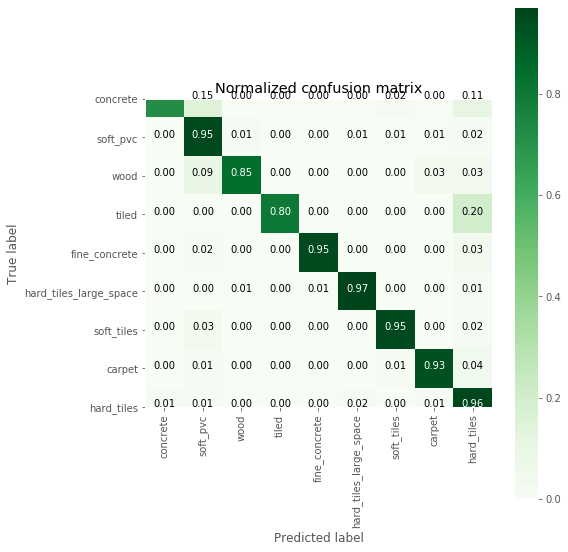

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.97      0.72      0.83        47
           1       0.90      0.95      0.93       172
           2       0.95      0.85      0.89        65
           3       1.00      0.80      0.89         5
           4       0.98      0.95      0.97        63
           5       0.98      0.97      0.98       141
           6       0.95      0.95      0.95        63
           7       0.95      0.93      0.94        89
           8       0.85      0.96      0.90       117

   micro avg       0.93      0.93      0.93       762
   macro avg       0.95      0.90      0.92       762
weighted avg       0.93      0.93      0.93       762



In [63]:
from catboost import CatBoostClassifier

cboost_grid = CatBoostClassifier(iterations=1000, eval_metric='Accuracy', task_type='GPU', logging_level='Silent')

le = LabelEncoder()
y_train_1 = le.fit_transform(y_train)
y_test_1 = le.transform(y_test)

cboost_grid_results = perform_model(cboost_grid, X_train, y_train_1, X_test, y_test_1, class_labels=labels)
# print_grid_search_attributes(cboost_grid_results['model'])

# 10. LGBM

In [1]:
import lightgbm
lightgbm.__version__

'3.2.1'

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:05:18.751187


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.057271


---------------------
|      Accuracy      |
---------------------

    0.9383202099737533


--------------------
| Confusion Matrix |
--------------------

 [[ 38   7   0   0   0   1   0   0   1]
 [  0 164   2   0   0   2   1   0   3]
 [  0   4  56   0   1   0   0   1   3]
 [  0   0   0   4   0   0   0   0   1]
 [  1   2   0   0  59   1   0   0   0]
 [  0   0   1   0   1 138   0   0   1]
 [  0   2   0   2   0   0  59   0   0]
 [  0   4   0   0   0   1   0  83   1]
 [  0   1   1   0   0   0   0   1 114]]


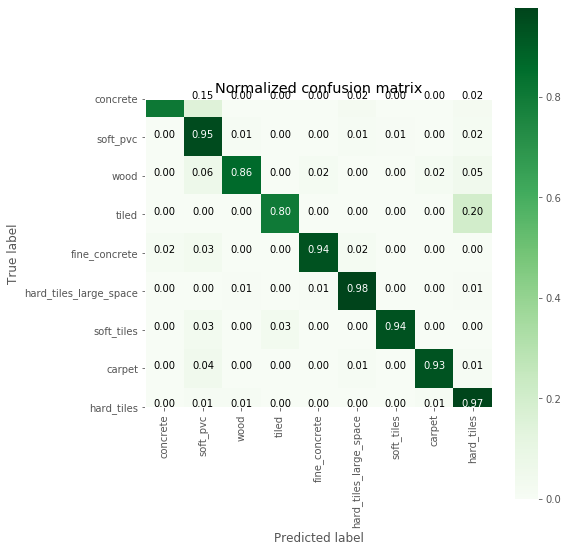

-------------------------
| Classifiction Report |
-------------------------
                        precision    recall  f1-score   support

                carpet       0.97      0.81      0.88        47
              concrete       0.89      0.95      0.92       172
         fine_concrete       0.93      0.86      0.90        65
            hard_tiles       0.67      0.80      0.73         5
hard_tiles_large_space       0.97      0.94      0.95        63
              soft_pvc       0.97      0.98      0.97       141
            soft_tiles       0.98      0.94      0.96        63
                 tiled       0.98      0.93      0.95        89
                  wood       0.92      0.97      0.95       117

             micro avg       0.94      0.94      0.94       762
             macro avg       0.92      0.91      0.91       762
          weighted avg       0.94      0.94      0.94       762

--------------------------
|      Best Estimator     |
--------------------------

	LGBM

In [64]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
params = {'n_estimators': np.arange(50,201,20)}

# lgbm_grid_results = perform_model(lgbm, X_train, y_train_1, X_test, y_test_1, class_labels=labels)


lgbm_grid = GridSearchCV(lgbm, param_grid=params, n_jobs=-1)

lgbm_grid_results = perform_model(lgbm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

print_grid_search_attributes(lgbm_grid_results['model'])

In [67]:
pickle.dump(lgbm_grid, open('lgbm.pkl', 'wb'))

# 11. Neural Network

### 11.1 - Simple MLP on featurised data

In [ ]:
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model
import tensorflow as tf

In [ ]:
le = LabelEncoder()
y_train_1 = le.fit_transform(y_train)
y_test_1 = le.transform(y_test)

In [ ]:
input_layer = Input(shape=(240,))
dense1 = Dense(256, activation='relu', name='dense1')(input_layer)
drop1 = Dropout(0.5, name='dropout1')(dense1)
dense2 = Dense(64, activation='relu', name='dense2')(drop1)
drop2 = Dropout(0.5, name='dropout2')(dense2)
dense3 = Dense(16, activation='relu', name='dense3')(drop2)
output_layer = Dense(units=9, activation='sigmoid')(dense3)

model = Model(input_layer, output_layer)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 240)]             0         
_________________________________________________________________
dense1 (Dense)               (None, 256)               61696     
_________________________________________________________________
dropout1 (Dropout)           (None, 256)               0         
_________________________________________________________________
dense2 (Dense)               (None, 64)                16448     
_________________________________________________________________
dropout2 (Dropout)           (None, 64)                0         
_________________________________________________________________
dense3 (Dense)               (None, 16)                1040      
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 153 

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

In [ ]:
epochs = 200
history = model.fit(X_train, y_train_1,
                    batch_size=512,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2,
                    )

Epoch 1/200
5/5 [==============================] - 1s 49ms/step - loss: 2.4051 - accuracy: 0.1928 - val_loss: 1.9738 - val_accuracy: 0.3295
Epoch 2/200
5/5 [==============================] - 0s 19ms/step - loss: 2.0408 - accuracy: 0.2596 - val_loss: 1.8976 - val_accuracy: 0.3311
Epoch 3/200
5/5 [==============================] - 0s 13ms/step - loss: 1.9591 - accuracy: 0.2834 - val_loss: 1.8134 - val_accuracy: 0.3525
Epoch 4/200
5/5 [==============================] - 0s 13ms/step - loss: 1.8751 - accuracy: 0.3265 - val_loss: 1.7429 - val_accuracy: 0.4033
Epoch 5/200
5/5 [==============================] - 0s 13ms/step - loss: 1.7916 - accuracy: 0.3610 - val_loss: 1.6716 - val_accuracy: 0.4852
Epoch 6/200
5/5 [==============================] - 0s 14ms/step - loss: 1.7296 - accuracy: 0.3839 - val_loss: 1.6085 - val_accuracy: 0.5197
Epoch 7/200
5/5 [==============================] - 0s 13ms/step - loss: 1.6993 - accuracy: 0.3929 - val_loss: 1.5551 - val_accuracy: 0.5311
Epoch 8/200
5/5 [===

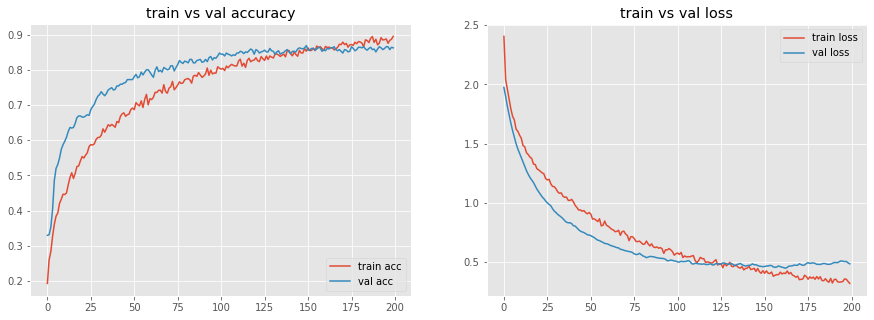

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(epochs), history.history['accuracy'], label='train acc')
plt.plot(range(epochs), history.history['val_accuracy'], label='val acc')
plt.legend(loc='lower right')
plt.title('train vs val accuracy');

plt.subplot(1,2,2)
plt.plot(range(epochs), history.history['loss'], label='train loss')
plt.plot(range(epochs), history.history['val_loss'], label='val loss')
plt.legend()
plt.title('train vs val loss');

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_1)
print('Test Loss: ', test_loss)
print('Test Accuracy: ', test_accuracy)

24/24 [==============================] - 0s 1ms/step - loss: 0.5473 - accuracy: 0.8373
Test Loss:  0.5472728610038757
Test Accuracy:  0.8372703194618225


## 11.2 LSTM, without featurisizing the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# importing necessary liberaries
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [ ]:
path = '/content/drive/MyDrive/Deep Learning/project 1 (Help Navigate Robots)/'

X_train_lstm = pd.read_csv(path+'X_train.csv')
y_train_lstm = pd.read_csv(path+'y_train.csv')

print('Train shape: ', X_train_lstm.shape, y_train_lstm.shape)

Train shape:  (487680, 13) (3810, 3)


In [ ]:
X_train_lstm.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


### Preparing data for lstm

In [ ]:
X_train_lstm = X_train_lstm.drop(['row_id', 'series_id', 'measurement_number'], axis=1)
X_train_lstm.head()

,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


In [ ]:
def resultant(x,y,z=0,w=0):
    return (x**2 + y**2 + z**2 + w**2)**0.5

def quaternion_to_euler_angle(q0, q1, q2, q3):
    a = 2*(q0*q1 + q2*q3)
    b = 1 - 2*(q1*q1 + q2*q2)
    t1 = np.arctan2(a,b)
    
    t2 = 2*(q0*q2 - q3*q1)
    
    c = 2*(q0*q3 + q1*q2)
    d = 1 - 2*(q2*q2 + q3*q3)
    t3 = np.arctan2(c,d)
    return pd.concat((t1, t2, t3), axis=1)

In [ ]:
# Doing some basic feature engineering
    
X_train_lstm.fillna(0,inplace=True)
X_train_lstm.replace(-np.inf,0,inplace=True)
X_train_lstm.replace(np.inf,0,inplace=True)

X_train_lstm["resultant_angular_velocity"] = resultant(X_train_lstm["angular_velocity_X"], X_train_lstm["angular_velocity_Y"],\
                                                          X_train_lstm["angular_velocity_Z"]
                                                       )

X_train_lstm["resultant_linear_acceleration"] = resultant(X_train_lstm["linear_acceleration_X"], X_train_lstm["linear_acceleration_Y"],\
                                                    X_train_lstm["linear_acceleration_Z"]
                                                    )

X_train_lstm["resultant_orientation"] = resultant(X_train_lstm["orientation_W"],X_train_lstm["orientation_X"],X_train_lstm["orientation_Y"],\
                                                X_train_lstm["orientation_Z"]
                                            )

X_train_lstm[["euler_t1", "euler_t2", "euler_t3"]] = quaternion_to_euler_angle(X_train_lstm['orientation_W'], X_train_lstm['orientation_X'],\
                                                                                X_train_lstm['orientation_Y'], X_train_lstm['orientation_Z']
                                                                               )
print(X_train_lstm.shape)
X_train_lstm.head()

(487680, 16)


,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,resultant_angular_velocity,resultant_linear_acceleration,resultant_orientation,euler_t1,euler_t2,euler_t3
0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532,0.109076,10.005392,0.999999,2.843272,-0.024665,1.396664
1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128,0.074240,9.538638,0.999998,2.843199,-0.024660,1.396646
2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267,0.030428,8.874697,1.000003,2.843224,-0.024726,1.396682
3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960,0.025082,10.164638,1.000005,2.843186,-0.024767,1.396721
4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410,0.010603,10.556132,0.999997,2.843195,-0.024782,1.396693


In [ ]:
# Normalizing the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_lstm = scaler.fit_transform(X_train_lstm)
X_train_lstm.shape

(487680, 16)

In [ ]:
# preparing data for LSTM input
X_train_lstm = X_train_lstm.reshape((-1, 128, X_train_lstm.shape[1]))
X_train_lstm.shape

(3810, 128, 16)

In [ ]:
le = LabelEncoder()
y_train_lstm = le.fit_transform(y_train_lstm.drop(['series_id', 'group_id'], axis=1)['surface'].to_numpy())
y_train_lstm.shape

(3810,)

In [ ]:
type(y_train_lstm)

numpy.ndarray

In [ ]:
model = Sequential()
model.add(LSTM(512, return_sequences=True, input_shape=(128,16)))
model.add( Dropout(0.5))
model.add(LSTM(256, return_sequences=True))
model.add( Dropout(0.5))
model.add(LSTM(128, return_sequences=True))
model.add( Dropout(0.5))
model.add(LSTM(32))
model.add(Dense(9, activation='sigmoid'))


model.compile(loss='sparse_categorical_crossentropy', 
              optimizer = Adam(learning_rate=0.0001),
              metrics = ['accuracy'],
              )
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_66 (LSTM)               (None, 128, 512)          1083392   
_________________________________________________________________
dropout_13 (Dropout)         (None, 128, 512)          0         
_________________________________________________________________
lstm_67 (LSTM)               (None, 128, 256)          787456    
_________________________________________________________________
dropout_14 (Dropout)         (None, 128, 256)          0         
_________________________________________________________________
lstm_68 (LSTM)               (None, 128, 128)          197120    
_________________________________________________________________
dropout_15 (Dropout)         (None, 128, 128)          0         
_________________________________________________________________
lstm_69 (LSTM)               (None, 32)              

In [ ]:
epochs = 250
history1 = model.fit(X_train_lstm, 
                      y_train_lstm,
                      validation_split=0.2,
                      epochs=epochs,
                      batch_size=1024,
                      verbose=1
                      )

Epoch 1/250
3/3 [==============================] - 7s 1s/step - loss: 2.1710 - accuracy: 0.1903 - val_loss: 2.1669 - val_accuracy: 0.1444
Epoch 2/250
3/3 [==============================] - 1s 238ms/step - loss: 2.1256 - accuracy: 0.2618 - val_loss: 2.1305 - val_accuracy: 0.1745
Epoch 3/250
3/3 [==============================] - 1s 242ms/step - loss: 2.0883 - accuracy: 0.2720 - val_loss: 2.0865 - val_accuracy: 0.1732
Epoch 4/250
3/3 [==============================] - 1s 237ms/step - loss: 2.0540 - accuracy: 0.2726 - val_loss: 2.0508 - val_accuracy: 0.1693
Epoch 5/250
3/3 [==============================] - 1s 240ms/step - loss: 2.0227 - accuracy: 0.2749 - val_loss: 2.0292 - val_accuracy: 0.1680
Epoch 6/250
3/3 [==============================] - 1s 237ms/step - loss: 1.9999 - accuracy: 0.2864 - val_loss: 2.0340 - val_accuracy: 0.1680
Epoch 7/250
3/3 [==============================] - 1s 241ms/step - loss: 1.9791 - accuracy: 0.2831 - val_loss: 2.0642 - val_accuracy: 0.1693
Epoch 8/250
3/3 

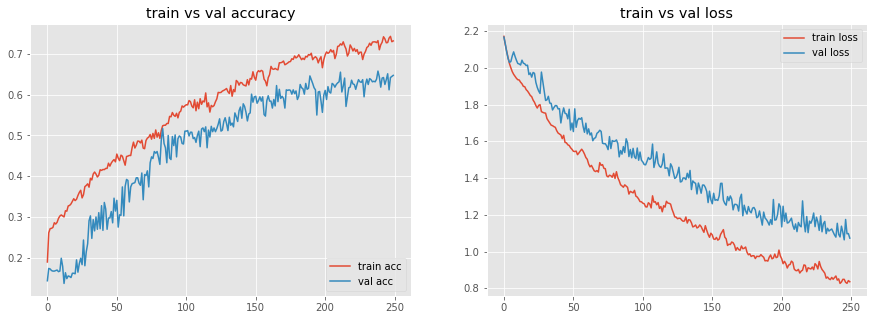

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(epochs), history1.history['accuracy'], label='train acc')
plt.plot(range(epochs), history1.history['val_accuracy'], label='val acc')
plt.legend(loc='lower right')
plt.title('train vs val accuracy');

plt.subplot(1,2,2)
plt.plot(range(epochs), history1.history['loss'], label='train loss')
plt.plot(range(epochs), history1.history['val_loss'], label='val loss')
plt.legend()
plt.title('train vs val loss');

# 12. Custom Stacking Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
log_reg = LogisticRegression(penalty='l1', C=10)
lr_svc = LinearSVC(C=1)
rbf_svm = SVC(kernel='rbf', C=10, gamma=0.005)
dt = DecisionTreeClassifier(max_depth=11)
rfc = RandomForestClassifier(n_estimators=150)
gbdt = GradientBoostingClassifier(max_depth=7, n_estimators=150)
xgb_clf = XGBClassifier(n_jobs=-1, num_class=9,max_depth=9, n_estimators=500, use_label_encoder=False)
gnb = GaussianNB()
cboost = CatBoostClassifier(iterations=1000, eval_metric='Accuracy', task_type='GPU', logging_level='Silent')
lgbm = LGBMClassifier(n_estimators=150)

clfs = [log_reg, lr_svc, rbf_svm, dt, rfc, gbdt, xgb_clf, cboost, lgbm]

In [ ]:
D1, D2, y1, y2 = train_test_split(X_train, y_train, test_size=0.5, random_state=42)
print('D1 shape   : ', D1.shape, y1.shape)
print('D2 shape   : ', D2.shape, y2.shape)
print('Test shape : ', X_test.shape, y_test.shape)

In [ ]:
from random import choices

In [ ]:
def stacking_classifier(D1, D2, X_test, y1, y2, y_test, clfs):
#     D1, y1 is used by the stacked models
#     D2, y2 is used by the meta model
#     X_test, y_test is used in meta model accuracy
    
    le = LabelEncoder()
    y1 = le.fit_transform(y1)
    y2 = le.transform(y2)
    y_test = le.transform(y_test)
    
    results = {'accuracy':[], 'no_of_model':[], 'meta_clf':[]}
    
    for k in range(11,50,4):
        # selecting k classifier form the give classifier in clfs,
        random_models = choices(clfs, k=k, weights=[3, 3, 9, 4, 10, 10, 10, 10, 10])
        
        # random sampling of 80% of data from D1 and y1
        rows = np.random.randint(0, len(D1), int(len(D1)*0.8))
        D1_sample = D1[rows, :]
        y1_sample = y1[rows]
        
        stacking_train_output = np.zeros((len(D2), k))
        stacking_test_output = np.zeros((len(X_test), k))
        
        for i, clf in enumerate(random_models):
            clf.fit(D1_sample, y1_sample)
            stacking_train_output[:, i] = clf.predict(D2).ravel()
            stacking_test_output[:, i] = clf.predict(X_test).ravel()
        
        
#         Standardizing data for meta classifier
        sk = StandardScaler()
        stacking_train_output = sk.fit_transform(stacking_train_output)
        stacking_test_output = sk.transform(stacking_test_output)

#         finding best meta classifier
        m_accuracy = 0
        meta_clf = None
        for mclf in clfs:
            mclf.fit(stacking_train_output, y2)
            y_pred = mclf.predict(stacking_test_output)
            
            stacking_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
            if stacking_accuracy > m_accuracy:
                m_accuracy = stacking_accuracy
                meta_clf = mclf
                
        results['no_of_model'].append(k)
        results['meta_clf'].append(meta_clf)
        results['accuracy'].append(m_accuracy)
            
    return results

In [2]:
results = stacking_classifier(D1, D2, X_test, y1, y2, y_test, clfs)

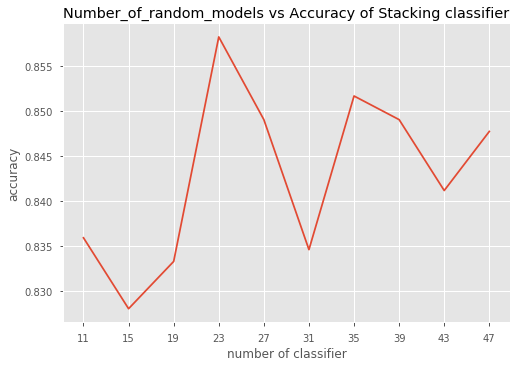

In [ ]:
plt.plot(results['no_of_model'], results['accuracy'])
plt.title('Number_of_random_models vs Accuracy of Stacking classifier')
plt.xlabel('number of classifier')
plt.ylabel('accuracy')
plt.xticks(results['no_of_model']);

**Observation:-** Stacking classifer gives highest accuracy  85.83% when number of stacked classifier are 23


# Comparing all models

In [ ]:
def show(name, accuracy):
    print('{:<25}:  {:.04}% \t{:.04}%'.format(name, accuracy*100, (1-accuracy)*100))

print('-------------------------- ----------   --------')
print('Model                        Accuracy     Error')
print('-------------------------- ----------   --------')

show('Logistic Regression', log_reg_grid_results['accuracy'])
show('Linear SVC', lr_svc_grid_results['accuracy'])
show('rbf SVM classifier', rbf_svm_grid_results['accuracy'])
show('DecisionTree', dt_grid_results['accuracy'])
show('Random Forest', rfc_grid_results['accuracy'])
show('GradientBoosting DT', gbdt_grid_results['accuracy'])
show('XgBoost', xgb_grid_results['accuracy'])
show('GuassianNB', gnb_grid_results['accuracy'])
show('CatBoostClassifier', cboost_grid_results['accuracy'])
show('LightGBMClassifier', lgbm_grid_results['accuracy'])
show('MLP', 0.8372)
show('LSTM', 0.65)

show('Custom StackingClassifier', 0.8583)


-------------------------- ----------   --------
Model                        Accuracy     Error
-------------------------- ----------   --------
Logistic Regression      :  67.72% 	32.28%
Linear SVC               :  69.95% 	30.05%
rbf SVM classifier       :  88.06% 	11.94%
DecisionTree             :  77.43% 	22.57%
Random Forest            :  91.86% 	8.136%
GradientBoosting DT      :  89.63% 	10.37%
XgBoost                  :  92.26% 	7.743%
GuassianNB               :  42.78% 	57.22%
CatBoostClassifier       :  93.04% 	6.955%
LightGBMClassifier       :  94.09% 	5.906%
MLP                      :  83.72% 	16.28%
LSTM                     :  65.0% 	35.0%
Custom StackingClassifier:  85.83% 	14.17%


### Among all the models LightGBM gives the highest accuracy, so choosing this model for final implementation.

<a href='http://help-robots.herokuapp.com/'>Click Here</a> to check its deployment

**References**
https://www.kaggle.com/c/career-con-2019/overview

https://www.kaggle.com/hiralmshah/robot-sensor-eda-fe-and-prediction-improvement

https://www.kaggle.com/jesucristo/1-smart-robots-most-complete-notebook

https://www.kaggle.com/robikscube/navigate-robots-first-look-and-eda

https://www.kaggle.com/danisamba/new-in-kaggle-eda-step-by-step